In [20]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
path = r'S:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis\Datasets'

train_dataset_path_I = os.path.abspath(os.path.join(path, 'train_dataset_method_II'))
GUT_test_path_I = os.path.join(path, 'GUT_test_method_I').replace("\\", "/")
ITU_YU_test_path_I = os.path.join(path, 'ITU_YU_test_method_I').replace("\\", "/")
MAAP_test_path_I = os.path.join(path, 'MAAP_test_method_I').replace("\\", "/")

train_dataset_path_II = os.path.abspath(os.path.join(path, 'train_dataset_method_II'))
GUT_test_path_II = os.path.join(path, 'GUT_test_method_II').replace("\\", "/")
ITU_YU_test_path_II = os.path.join(path, 'ITU_YU_test_method_II').replace("\\", "/")
MAAP_test_path_II = os.path.join(path, 'MAAP_test_method_II').replace("\\", "/")

# Load datasets
train_I = tf.data.Dataset.load(train_dataset_path_I)
GUT_test_I = tf.data.Dataset.load(GUT_test_path_I)
ITU_YU_test_I = tf.data.Dataset.load(ITU_YU_test_path_I)
MAAP_test_I = tf.data.Dataset.load(MAAP_test_path_I)

train_II = tf.data.Dataset.load(train_dataset_path_II)
GUT_test_II = tf.data.Dataset.load(GUT_test_path_II)
ITU_YU_test_II = tf.data.Dataset.load(ITU_YU_test_path_II)
MAAP_test_II = tf.data.Dataset.load(MAAP_test_path_II)

In [19]:
emotions = ["Happy", "Sad", "Angry", "Fear", "Disgusted", "Surprised"]

## MODEL I

In [43]:
model_method_I = tf.keras.models.load_model('//153.19.52.107/emboa/IO3-sessions/NEW STRUCTURE/de-earlyfusionthesis/Models/model_method_I/model.keras')

In [44]:
model_method_I.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 10, 515)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 10, 515)   │          0 │ input_layer_7[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 10, 515)   │          0 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_2 (Any)         │ (None, 10)        │          0 │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 10, 128)   │    296,960 │ masking[0][0],    │
│ (Bidirectional)     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 10, 32)    │      4,128 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 10, 6)     │        198 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 903,860 (3.45 MB)

 Trainable params: 301,286 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 602,574 (2.30 MB)

In [45]:
test_set = MAAP_test_I
# Getting predictions (chat)
y_pred = model_method_I.predict(test_set.map(lambda x, _: x))
y_true = tf.concat([y for _, y in test_set], axis=0)

72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step


In [46]:
categorical_accuracy = tf.keras.metrics.CategoricalAccuracy()
categorical_accuracy.update_state(y_true, y_pred)
print(f"Categorical Accuracy: {categorical_accuracy.result().numpy()}")

Categorical Accuracy: 0.9801476001739502


In [47]:
y_true_indices = np.argmax(y_true.numpy(), axis=-1).flatten()
y_pred_indices = np.argmax(y_pred, axis=-1).flatten()

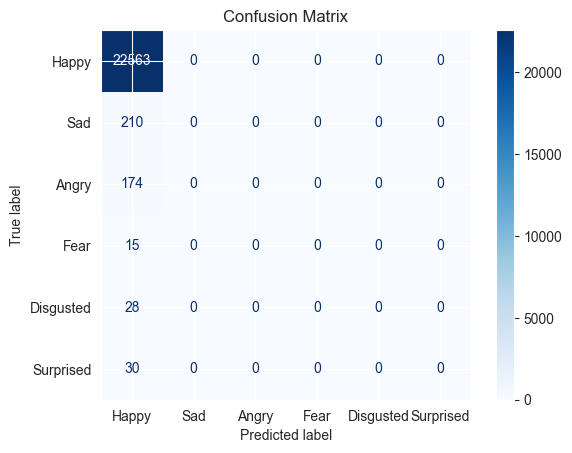

In [48]:
cm = confusion_matrix(y_true_indices, y_pred_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [36]:
for i, emotion in enumerate(emotions):
    
    # Precision, Recall, F1 for this class
    true_class = (y_true_indices == i)
    pred_class = (y_pred_indices == i)
    precision = np.sum(true_class & pred_class) / np.sum(pred_class)
    recall = np.sum(true_class & pred_class) / np.sum(true_class)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print(f"Metrics for {emotion}:")
    print(f"  Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Metrics for Happy:
  Precision: nan, Recall: 0.00, F1-Score: nan
Metrics for Sad:
  Precision: nan, Recall: 0.00, F1-Score: nan
Metrics for Angry:
  Precision: 0.01, Recall: 1.00, F1-Score: 0.02
Metrics for Fear:
  Precision: nan, Recall: 0.00, F1-Score: nan
Metrics for Disgusted:
  Precision: nan, Recall: 0.00, F1-Score: nan
Metrics for Surprised:
  Precision: nan, Recall: 0.00, F1-Score: nan


C:\Users\oskik\AppData\Local\Temp\ipykernel_5624\1910999586.py:6: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(true_class & pred_class) / np.sum(pred_class)


## MODEL II

In [5]:
model_method_II = tf.keras.models.load_model('//153.19.52.107/emboa/IO3-sessions/NEW STRUCTURE/de-earlyfusionthesis/Models/model_method_II/model.keras')

In [6]:
model_method_II.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 10, 64)         │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10, 6)          │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 452,276 (1.73 MB)

 Trainable params: 150,758 (588.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 301,518 (1.15 MB)

In [10]:
import tensorflow as tf
test_set = MAAP_test_II
# Getting predictions (chat)
y_pred = model_method_II.predict(test_set.map(lambda x, _: x))
y_true = tf.concat([y for _, y in test_set], axis=0)

# Function
def compute_similarity(y_true, y_pred, emotion_index):
    # Ensure tensors are of the same type cause some bugs idk
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Extract true and predicted values for the specific emotion
    true_values = y_true[:, :, emotion_index]
    pred_values = y_pred[:, :, emotion_index]
    
    # Create a mask for non-zero true values (bylo na wloskich zajeciach)
    mask = tf.not_equal(true_values, 0)
    
    # Apply the mask
    true_values_masked = tf.boolean_mask(true_values, mask)
    pred_values_masked = tf.boolean_mask(pred_values, mask)
    
    # Compute the similarity: 1 - |true - prediction|
    similarity = 1 - tf.abs(true_values_masked - pred_values_masked)

    # Compute Mean Average Similarity (MAS)
    mas = tf.reduce_mean(similarity)
    
    # How many labels were used for this metric
    label_count = tf.size(true_values_masked).numpy()
    
    return mas.numpy(), label_count

# List for emotions
mas_per_emotion = []
label_counts = []

for i, emotion in enumerate(emotions):
    mas, label_count = compute_similarity(y_true, y_pred, i)
    mas_per_emotion.append(mas)
    label_counts.append(label_count)
    print(f"Similarity for {emotion}: {mas}, Labels Used = {label_count}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step
Similarity for Happy: 0.7369638681411743, Labels Used = 8441
Similarity for Sad: 0.6879954934120178, Labels Used = 924
Similarity for Angry: 0.7272648215293884, Labels Used = 642
Similarity for Fear: 0.651867687702179, Labels Used = 294
Similarity for Disgusted: 0.6339427828788757, Labels Used = 281
Similarity for Surprised: 0.6685762405395508, Labels Used = 423
